In [70]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/MLdatasets/EthTrimmed.csv")
print(df['Allele1'][0])

CTCCGGCGACGCTTTAGGGACATAGATGGGAGCTCCGATTCCCGTGAACACGGCTCGGACCGGCAAGGGGTGCCAATTACGAACTTAAATTGGGCGGGTAGAGCATGACAAATGTAGTACGACAAGCTGCCTGCGTTCCGATCCCTTCTGTCCGGTGGCACGCGCGCGAAAAGTTCCAGTCACAATCGTTCCCCGACTGCGAGTTCGGCTCCCCATTAAGTAGAGAGGAGGTCCGACAATCTCGAGTAGCTTGTCCGTTGGGCCAAAAGAATGCTGCGTACAGGCGCCCCGCCGTTGCCCTCCAGTTTATTTACATTCCCGAGTGACTAAAAACTCCTATCGAGTTGCGCATTGACTAACCGCAAGTCGTACCATAATGCCCTATATAGTGGCGGGATCTAGTACTGCTTTGTACTCATGGTCTGGCACGGCCAGCTTCTCGGAATCAAGGGCTCATGCATGTCGTCAATCTTGGGCCGTTGGTGGCAGCGTTCTGCTCAATTTGCCGCAACCGAGGCCTACGCTGAGATGGCCCGTCAAAGTCATGCGTGCAGCGGATGATTGACTCTCCCACTCTCCTGACTTGACCCGCCAGTATACGTCTAGTTCGATTTGGCACAGCCGCCTCCCGGCATTCAATCTTCATGCGTGAATGGATATATTTTGTGCCACTTGCGGGCGAACCCCCGCCAGGTATGTCCGAAGGGCCGGACACTGCAAGGTGCGCCCCACCCTATCGATCGTCAAGCCGCTTCCCAATGGTTGTGGGCCGTATCCACAATCTAGGCTTGAACAGCGCGCAAACTGCTCAGAGTCGTCCGGCGTATGTCGGACGGACCTATAACCCAGAGTCGGCGACGGTGGCGAAGCAAAGGACTGAAGGGATTTCACCTGAATCCCATGGATCTCGGGGGAGGGTGAGGGATCTAACCCACACATCTCAGGAGCAACGACGGCGAATTGTGAGCCCGGTCTCTGTCGCTCGCTACGCCCGTGGTAG

In [71]:
pd.options.display.max_columns=None
pd.set_option("max_colwidth",10)
N=1998
df=df.drop(columns=['ParentM','ParentF','EthA','EthE','EthK','EthP'])
print(df)

       Name Gender    Allele1    Allele2
0        E0      F  CTCCGG...  CTCCGT...
1        E1      F  CTCCGT...  CTCCGT...
2        E2      F  CTCCGT...  CTCCGT...
3        E3      M  CTCCGT...  CTCCGT...
4        E4      M  CTCCGT...  CTCCGT...
...     ...    ...        ...        ...
1994  E1994      F  CTCCGT...  CTCCGT...
1995  E1995      F  CTCCGT...  CTCCGT...
1996  E1996      M  CTCCGT...  CTCCGT...
1997  E1997      M  CTCCGT...  CTCCGT...
1998  E1998      F  CTCCGT...  CTCCGT...

[1999 rows x 4 columns]


In [72]:
sampleAllele=df['Allele1'][0]
sampleAllele2=df['Allele2'][0]
print(sampleAllele.count("A"))
print(sampleAllele.count("C"))
print(sampleAllele.count("G"))
print(sampleAllele.count("T"))

9339
10126
10149
9494


Chargaff Nice

In [73]:
freqs=[]
for char1 in ['A','G','C','T']:
  for char2 in ['A','G','C','T']:
    #print((char1+char2)+": "+str(sampleAllele.count(char1+char2)))
    freqs.append(((char1+char2),sampleAllele.count(char1+char2)))
sortedFreq=sorted(freqs,key=lambda x:x[1])
for term in sortedFreq:
  print(term[0]+": "+str(term[1]))

AA: 1835
TT: 1915
GG: 2018
CC: 2092
TA: 2216
AT: 2275
CA: 2379
TC: 2407
AG: 2409
GT: 2411
AC: 2413
CT: 2437
TG: 2500
GA: 2503
GC: 2665
CG: 2670


Looks like some kind of pattern in digrams too. AA,GG,TT,CC i.e like-like combos are infrequent as compared to unlike combinations like GC

In [74]:
print(len(sampleAllele))
#print(len(sampleAllele2))
differingIn=0
for i in range(len(sampleAllele2)):
  if sampleAllele[i]!=sampleAllele2[i]:
    differingIn+=1
print(differingIn/len(sampleAllele)) #34.76 percent difference in both alleles.

39108
0.3476015137567761


In [75]:
countMap={}
for i in range(N):
      firstAllele=df['Allele1'][i]
      secondAllele=df['Allele2'][i]
      combo=firstAllele[30]+secondAllele[30]
      if combo in countMap.keys():
        countMap[combo]+=1
      else:
        countMap[combo]=1
for combo in countMap.keys():
  print(combo+": "+str(countMap[combo]))

AA: 1773
GA: 112
AG: 105
GG: 8


IDK! GA and AG are SNPs probably? vary the number 30 to check for other SNPs?




In [79]:
def majorAllele(pos):
  countMap={}
  for i in range(N):
      firstAllele=df['Allele1'][i]
      secondAllele=df['Allele2'][i]
      combo=firstAllele[pos]+secondAllele[pos]
      if combo in countMap.keys():
        countMap[combo]+=1
      else:
        countMap[combo]=1
  major="XX"
  cnt=0
  for combo in countMap.keys():
    if countMap[combo]>cnt:
      major=combo
      cnt=countMap[combo]
  return major
print(majorAllele(52))

majorMap=[]
for i in range(len(df['Allele1'][0])):
  majorMap.append(majorAllele(i))

GG


In [80]:
SNPar=[]
for i in range(len(df['Allele1'][0])):
  firstAllele=df['Allele1'][0]
  secondAllele=df['Allele2'][0]
  combo=firstAllele[i]+secondAllele[i]
  major=majorMap[i]
  snpVal=0
  if major[0]==combo[0]:
    snpVal+=1
  if major[1]==combo[1]:
    snpVal+=1
  SNPar.append(snpVal)
print(SNPar)
print(SNPar.count(2))
print(SNPar.count(1))
print(SNPar.count(0))

[2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 

As expected a lot of 2's some 1's and very few 0's.This roughly means that for a lot of positions the common allels are found, for some there is one common and one less common and for very few we have both less commmon allels.

In [81]:
import numpy as np
SnPmatrix=[]
for i in range(N):
  SNPar=[]
  for pos in range(len(df['Allele1'][0])):
    firstAllele=df['Allele1'][i]
    secondAllele=df['Allele2'][i]
    combo=firstAllele[pos]+secondAllele[pos]
    major=majorMap[pos]
    snpVal=0
    if major[0]==combo[0]:
      snpVal+=1
    if major[1]==combo[1]:
      snpVal+=1
    SNPar.append(snpVal)
  SnPmatrix.append(SNPar)
SnPmatrix=np.array(SnPmatrix)
SnPmatrix=SnPmatrix.transpose()
print(SnPmatrix)


[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 0 ... 2 2 2]
 [2 0 2 ... 2 1 1]
 [2 1 2 ... 2 0 0]]


In [82]:
print(SnPmatrix.shape)

(39108, 1998)


In [87]:
SnPmatrix=SnPmatrix.transpose()

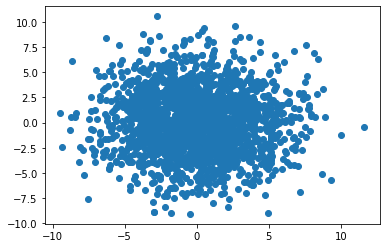

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_Val=PCA(n_components=2).fit(SnPmatrix).transform(SnPmatrix)
plt.scatter(pca_Val[:,0],pca_Val[:,1])
